In [1]:
import os
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

pd.set_option('max_columns', 330)
pd.set_option('max_rows', 1000)

In [2]:
%matplotlib inline
# plt.style.use('ggplot')

# Load DataFrames

In [3]:
input_path = r'C:\Users\Panagiotis.Mavritsak\Desktop\Ner thesis\\'
df = pd.read_excel(input_path+'data.xlsx', index_col=0)
df

Aluminium (USD/tonne)  Copper (USD/pound)  Zinc (USD/tonne)  \
Date                                                                      
2019-12-31                1789.25              2.8510           2275.50   
2019-12-30                1807.50              2.8805           2304.50   
2019-12-27                1822.50              2.8765           2312.00   
2019-12-24                1818.00              2.8730           2274.75   
2019-12-23                1786.25              2.8530           2284.50   
...                           ...                 ...               ...   
1995-01-09                2033.50              1.4090           1149.30   
1995-01-06                2022.00              1.3740           1140.00   
1995-01-05                2005.80              1.3590           1138.00   
1995-01-04                1970.80              1.3420           1125.80   
1995-01-03                2007.00              1.3560           1142.80   

            Nickel (USD/MT)  Lead (USD/tonne)  Tin (USD/tonne)  \
Date                                                             
2019-12-31          13950.0           1913.50          17147.5   
2019-12-30          14237.0           1930.25          16977.5   
2019-12-27          14136.5           1926.25          17070.0   
2019-12-24          14270.0           1934.50          17195.0   
2019-12-23          14281.0           1901.00          17275.0   
...                     ...               ...              ...   
1995-01-09           9151.0            663.80           6059.0   
1995-01-06           9262.0            659.00           6025.0   
1995-01-05           9093.0            649.80           6009.0   
1995-01-04           8786.0            649.00           5962.0   
1995-01-03           8900.0            657.00           6032.0   

            Silver (USD/ t oz)   Gold (USD/ t oz)  Crude Oil WTI (USD/ bbl)  \
Date                                                                          
2019-12-31               17.921            1523.1                   60.7556   
2019-12-30               18.001            1518.6                   61.4049   
2019-12-27               17.900            1514.3                   61.4917   
2019-12-24               17.821            1500.6                   61.0619   
2019-12-23               17.463            1484.3                   60.4154   
...                         ...               ...                       ...   
1995-01-09                4.655             373.1                   17.4000   
1995-01-06                4.616             371.2                   17.6700   
1995-01-05                4.694             375.4                   17.7200   
1995-01-04                4.595             374.0                   17.4800   
1995-01-03                4.721             379.6                   17.4400   

            Crude oil Brent (USD/bbl)  Natural gas (USD/Mmbtu)  USD index   \
Date                                                                         
2019-12-31                    66.2279                   2.1512      96.389   
2019-12-30                    66.6103                   2.1663      96.740   
2019-12-27                    66.8472                   2.1940      96.919   
2019-12-24                    66.0053                   2.1456      97.654   
2019-12-23                    65.4767                   2.1828      97.658   
...                               ...                      ...         ...   
1995-01-09                    16.2800                   1.4540      88.410   
1995-01-06                    16.5000                   1.4990      89.610   
1995-01-05                    16.4600                   1.5520      88.980   
1995-01-04                    16.1900                   1.6170      89.310   
1995-01-03                    16.0900                   1.6830      89.110   

            DJIA (USD)   FTSE 100 (GBP)  Hang seng (HKD)   US libor  
Date                                                            

check if values are missing

In [4]:
df.isnull().sum()

Aluminium (USD/tonne)        0
Copper (USD/pound)           0
Zinc (USD/tonne)             0
Nickel (USD/MT)              0
Lead (USD/tonne)             0
Tin (USD/tonne)              0
Silver (USD/ t oz)           0
Gold (USD/ t oz)             0
Crude Oil WTI (USD/ bbl)     0
Crude oil Brent (USD/bbl)    0
Natural gas (USD/Mmbtu)      0
USD index                    0
DJIA (USD)                   0
 FTSE 100 (GBP)              0
Hang seng (HKD)              0
 US libor                    0
dtype: int64

### Plot distributions

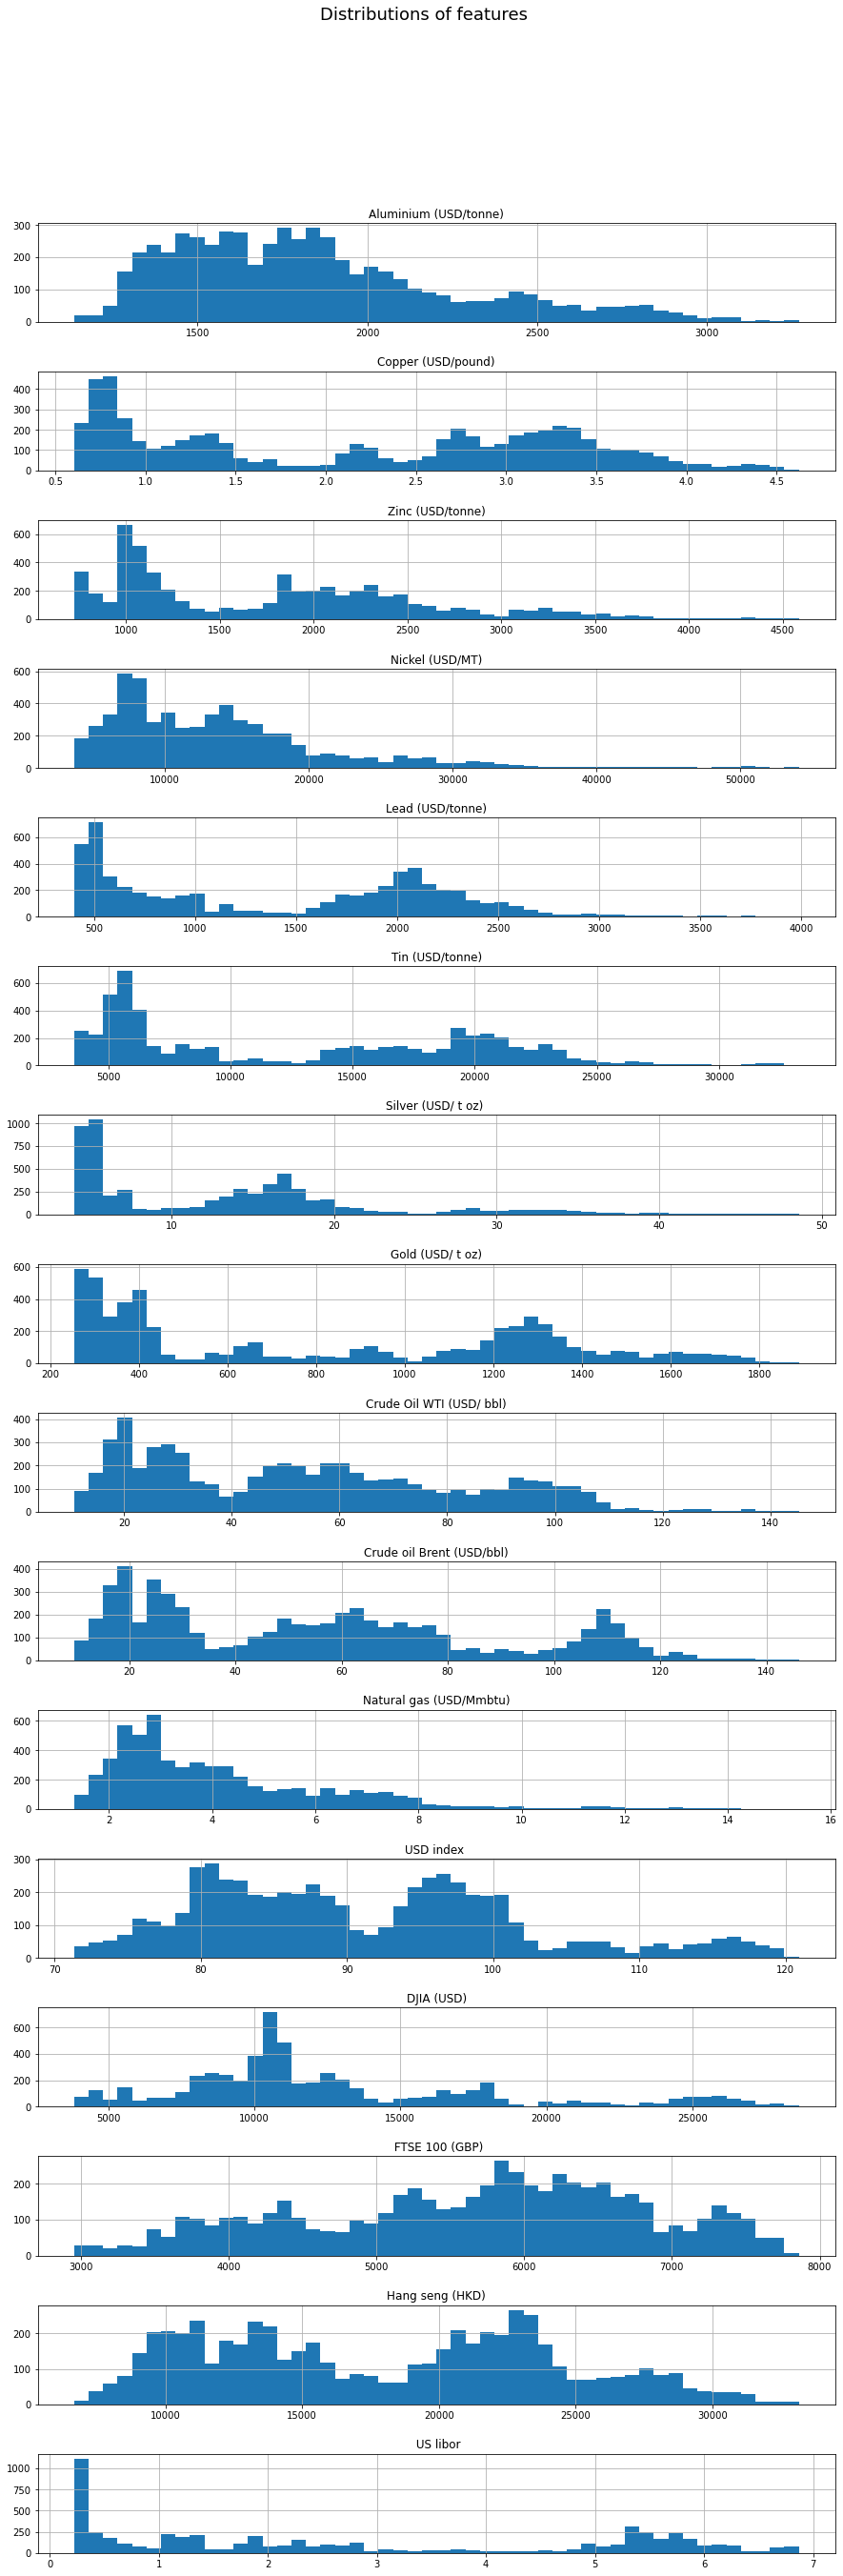

In [5]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    df[column].hist(ax=ax, bins=50)

    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Autocorrelation plots

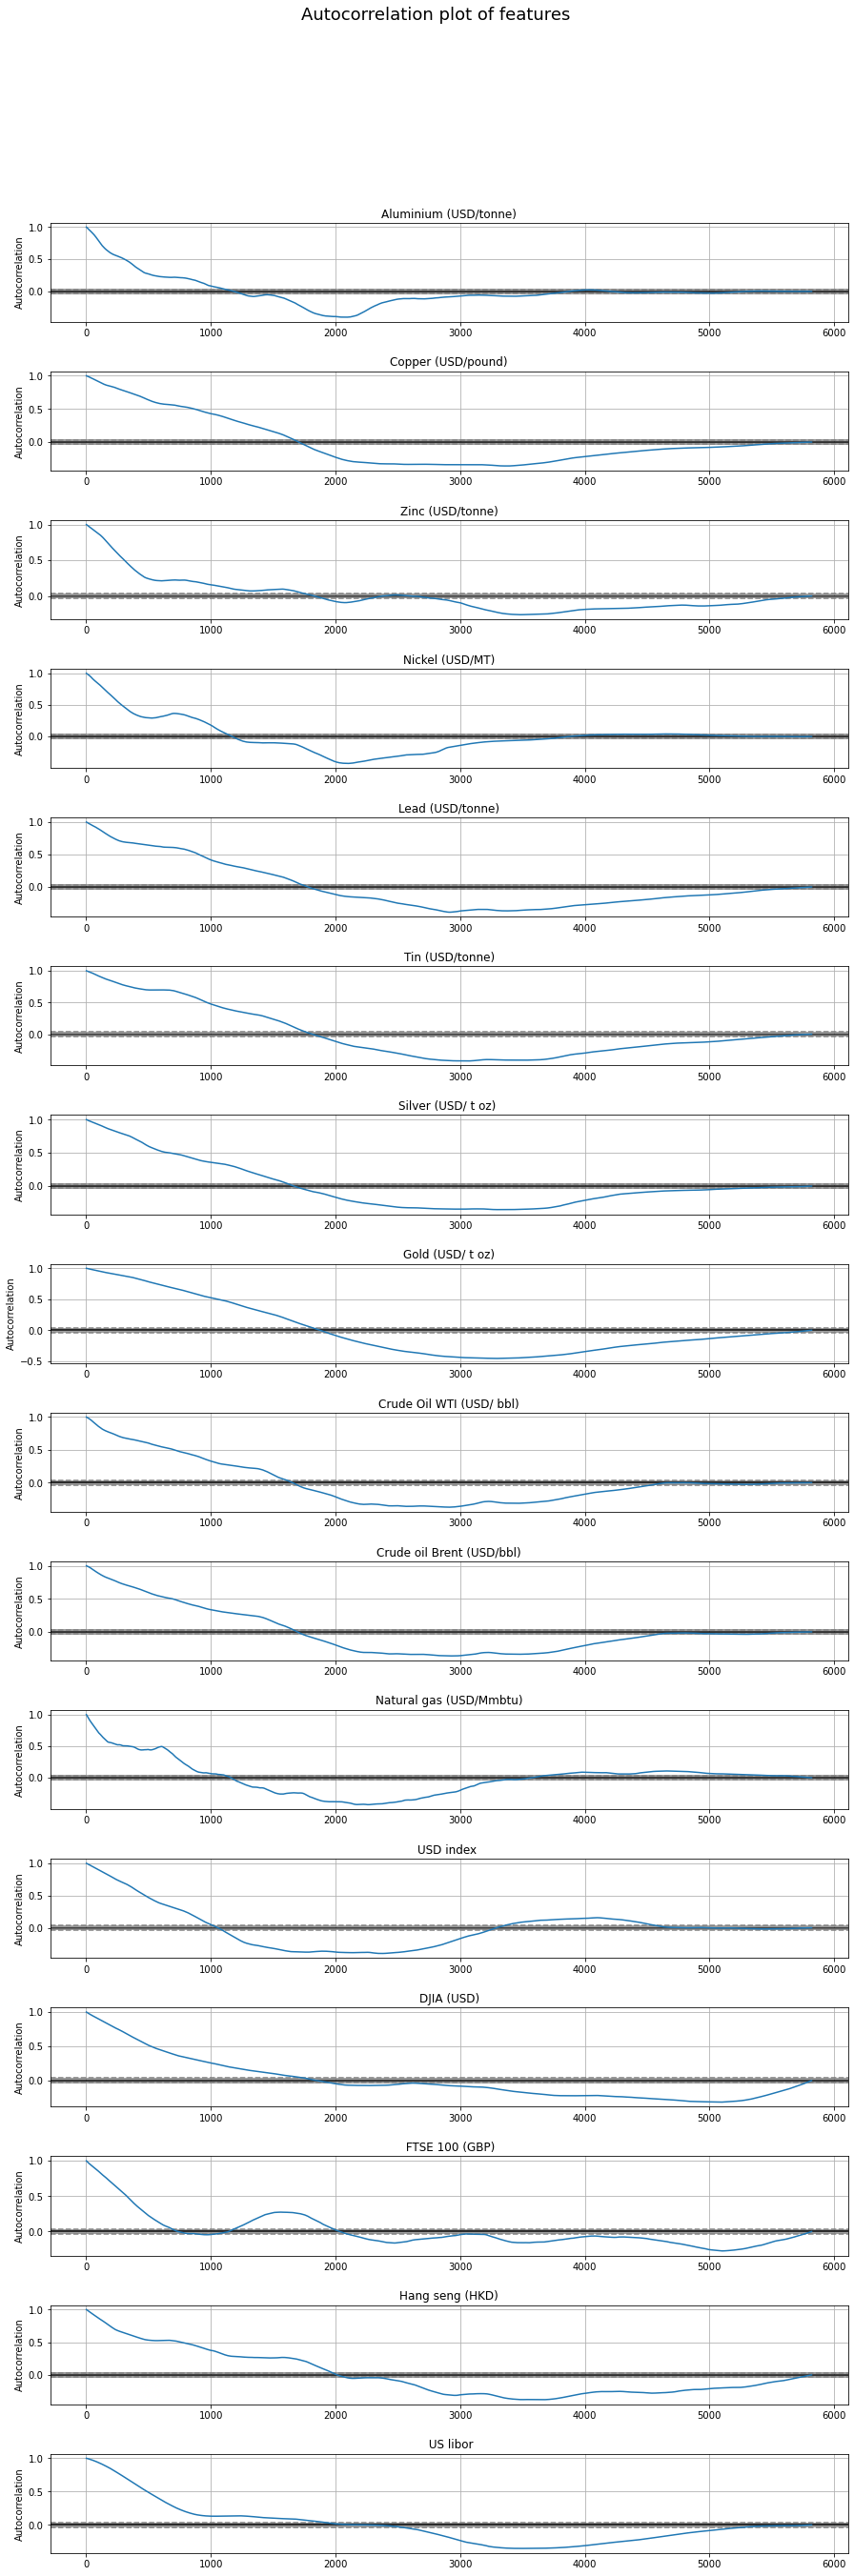

In [6]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Autocorrelation plot of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    pd.plotting.autocorrelation_plot(df[column], ax=ax)
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Time-series and correlation plots

Functions for anomalies and plotting

In [7]:
def calc_anom_df(df):
    '''Calculate daily anomolies based on average data throughout the full time series
    Returns: New pandas dataframe with anomoloies calculated for each variable
    '''
    anom_df = pd.DataFrame(data=df.index, columns=['Date'])
    anom_df.set_index('Date', inplace=True)
    var_list = list(df.columns)
    
    for var in var_list:
        anom_df[var] = df[var] - df.mean()[var]
    
    return(anom_df)

def var_plots(df, anomaly=False):
    '''Plot of volatility alongside with raw features
    Return: Time series plots of all variables
    '''
    if anomaly==True:
        title=f'Features ANOMALIES time-series'
    else:
        title=f'Features time-series'
        
    df.plot(subplots=True, figsize=(16,12), title=title)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
    plt.xlabel('Date', fontsize = 14)
    plt.grid()
    
    if anomaly==True:
        title=f'Correlation map on ANOMALIES'
    else:
        title=f'Correlation map'
    
    corrmat = df.corr()
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
    plt.title(title, fontsize=15)
    plt.show()

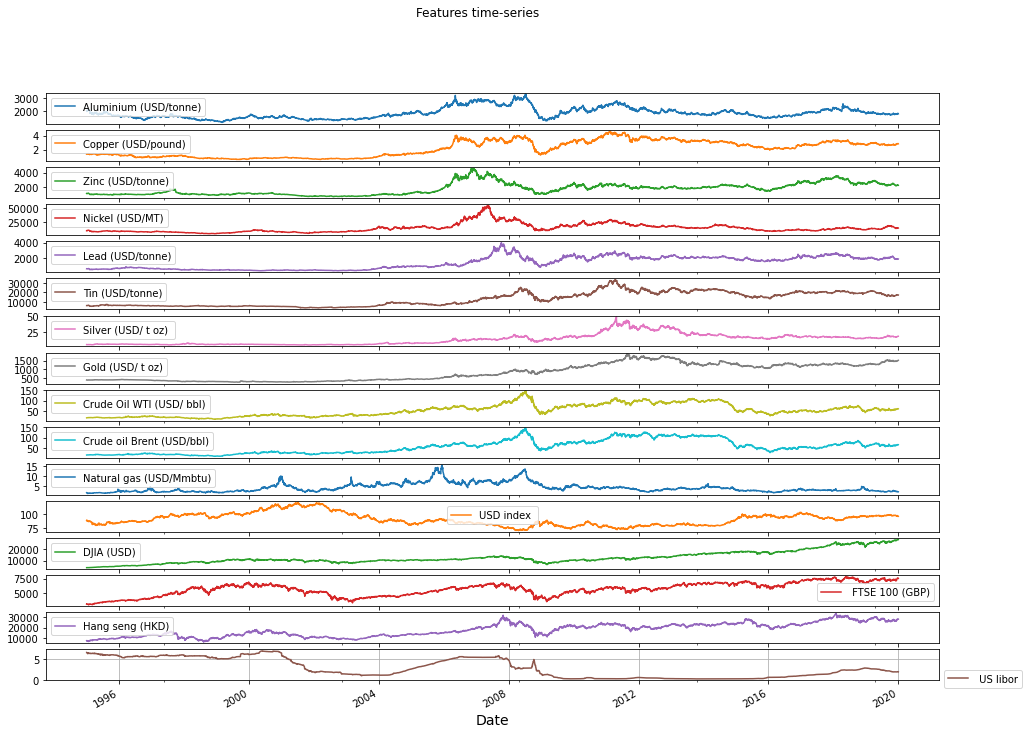

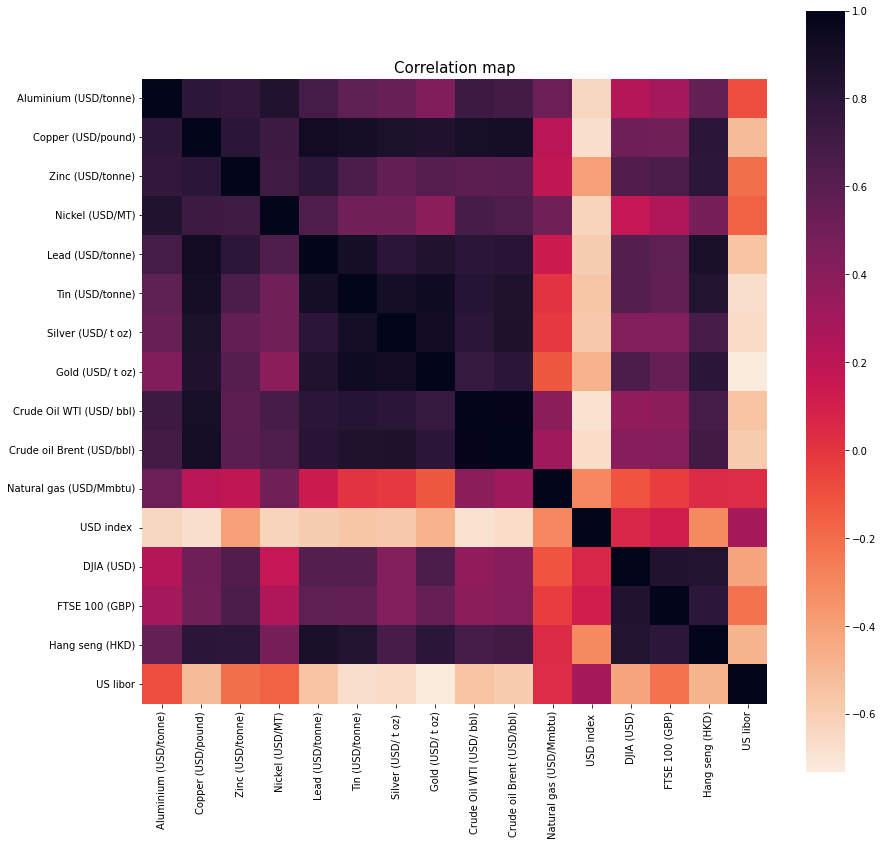

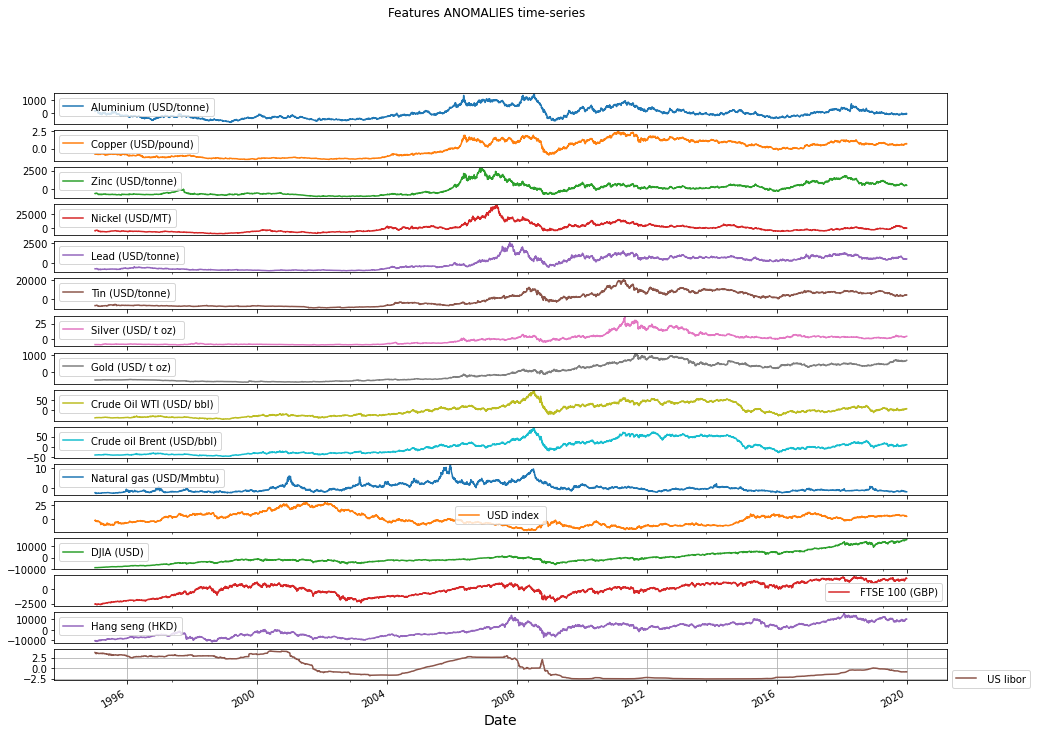

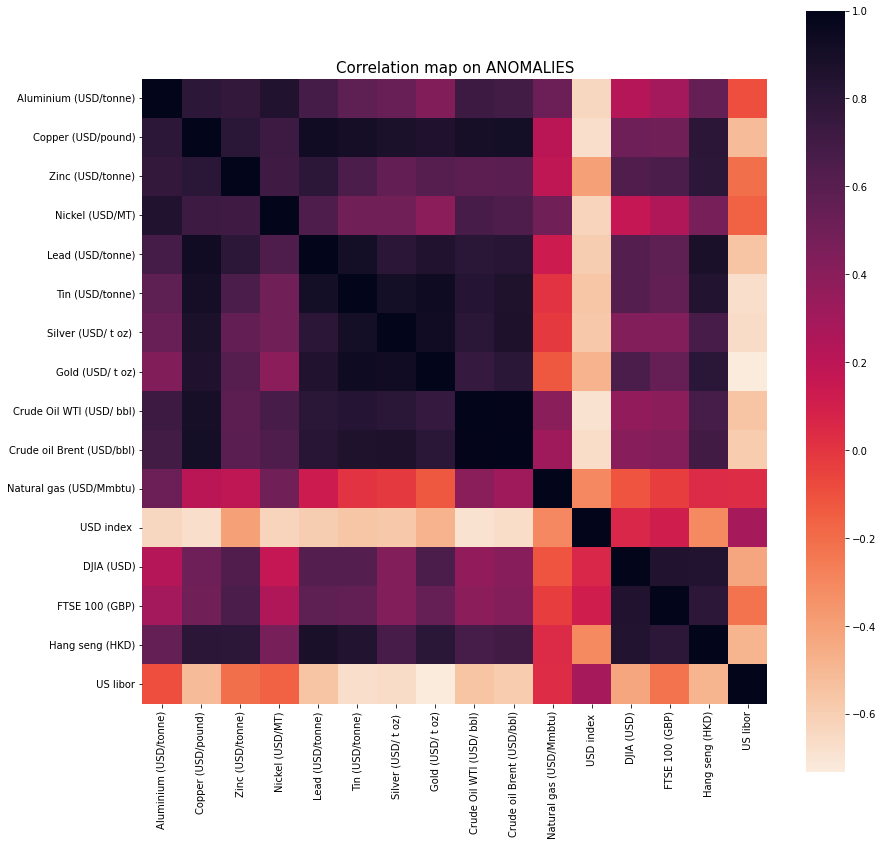

In [8]:
anom_df = calc_anom_df(df)

var_plots(df)
var_plots(anom_df, anomaly=True)

### Boxplots seasonal etc.

In [9]:
def season_plot(df, column):
    '''Produces plots for analysis of monthly malaria prevalence time series
    Arg1: dataframe produced from data preparation script, including 'malaria prevalence' column
    Returns: Time series plot, ACF plot, month-wise boxplot, year-wise boxplot
    '''
    season_df = df[['Date', column]]
    season_df['year'] = season_df.Date.dt.year
    season_df['month'] = season_df.Date.dt.month
    season_df = season_df.dropna()
    variable = column
    fig, ax = plt.subplots(figsize=(15, 6))

    palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
    sns.lineplot(x=season_df['month'], y=season_df[variable], hue=season_df['year'], palette='muted')
    ax.set_title('Seasonal plot of '+column, fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Month', fontsize = 16)
    ax.set_ylabel(column, fontsize = 16)
    ax.legend(loc='right')
    plt.show()

    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.boxplot(x=season_df['month'], y=season_df[variable], ax=ax[0])
    ax[0].set_title('Month-wise Box Plot', fontsize = 20, loc='center')
    ax[0].set_xlabel('Month', fontsize = 16)
    ax[0].set_ylabel(column, fontsize = 16)
    
    sns.boxplot(x=season_df['year'], y=season_df[variable], ax=ax[1])
    ax[1].set_title('Year-wise Box Plot', fontsize = 20, loc='center')
    ax[1].set_xlabel('Year', fontsize = 16)
    ax[1].set_ylabel(column, fontsize = 16)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


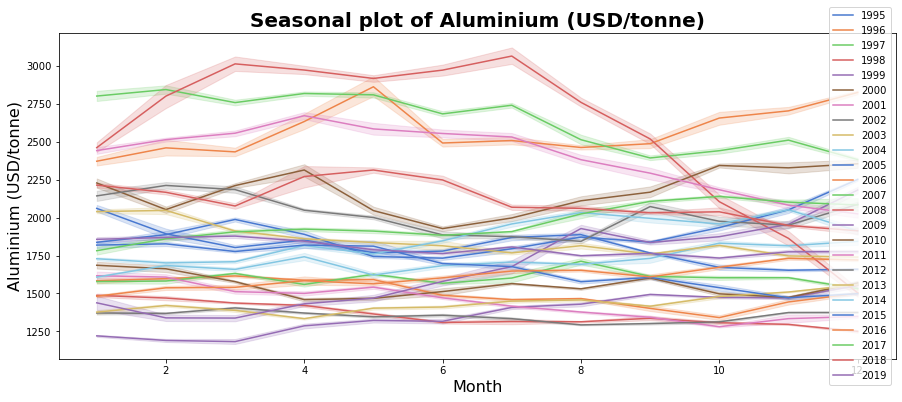

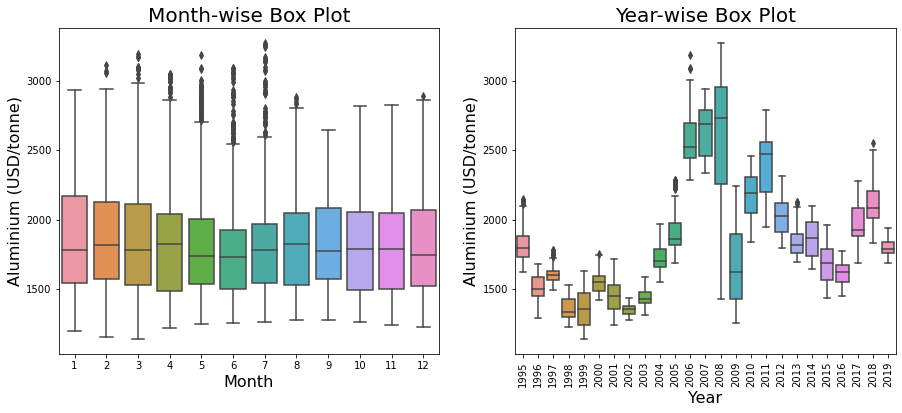

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


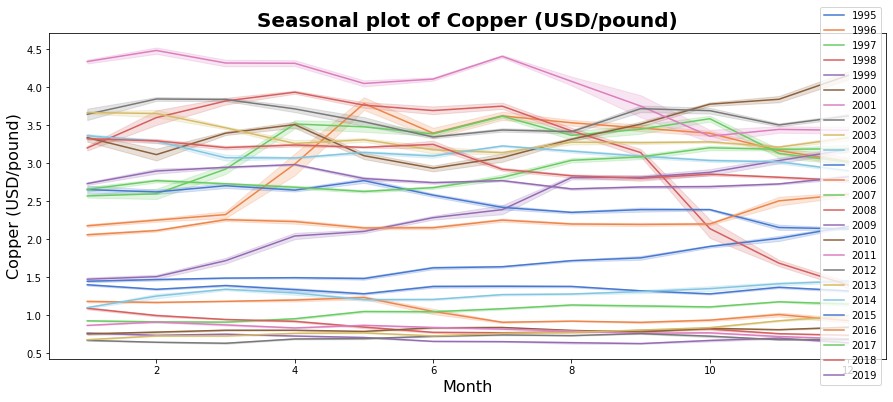

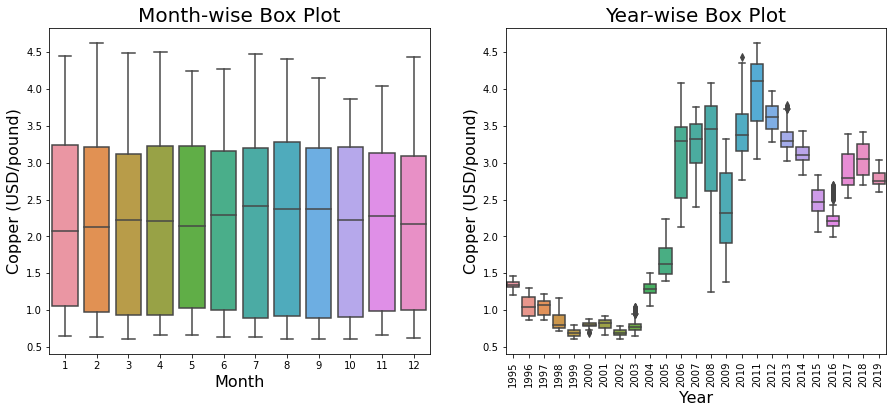

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


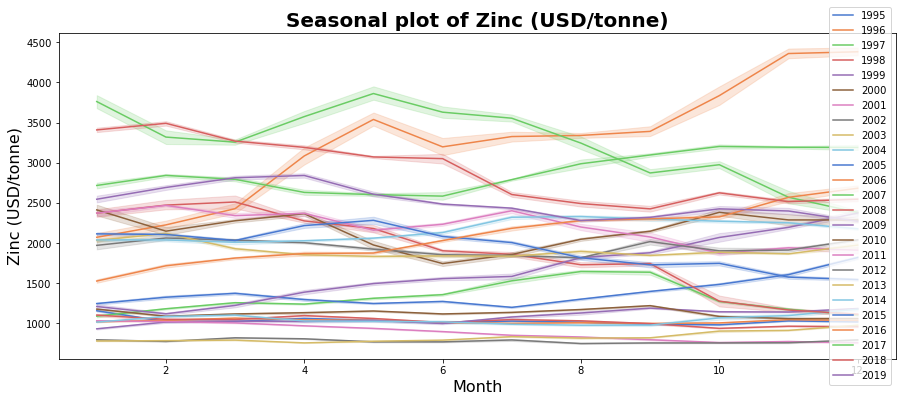

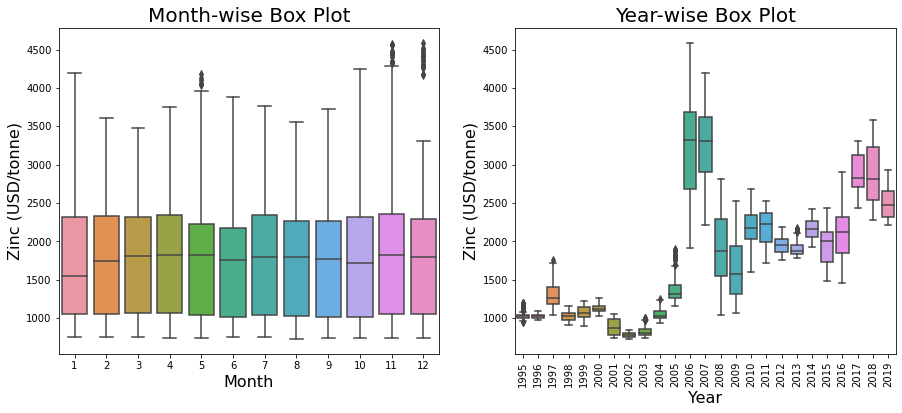

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


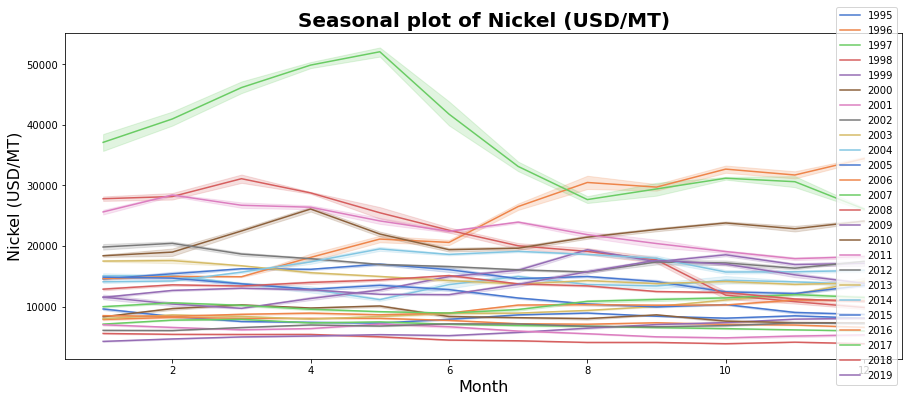

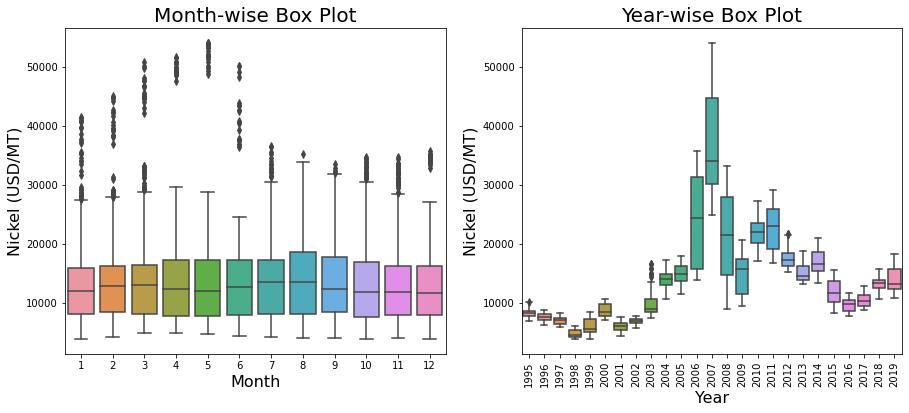

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


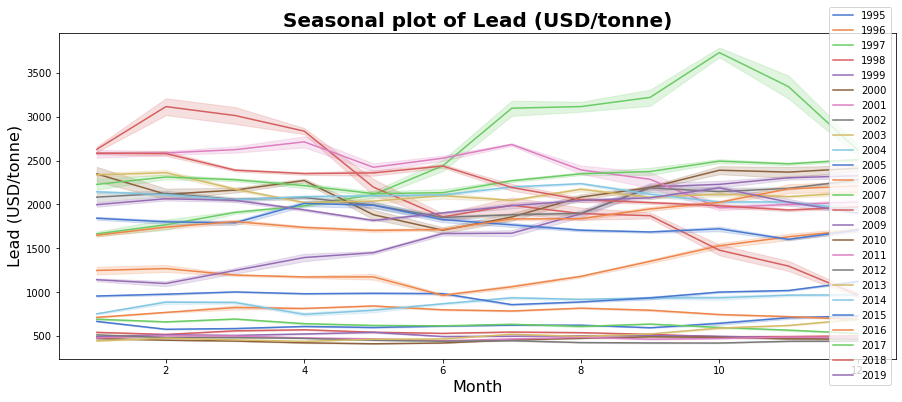

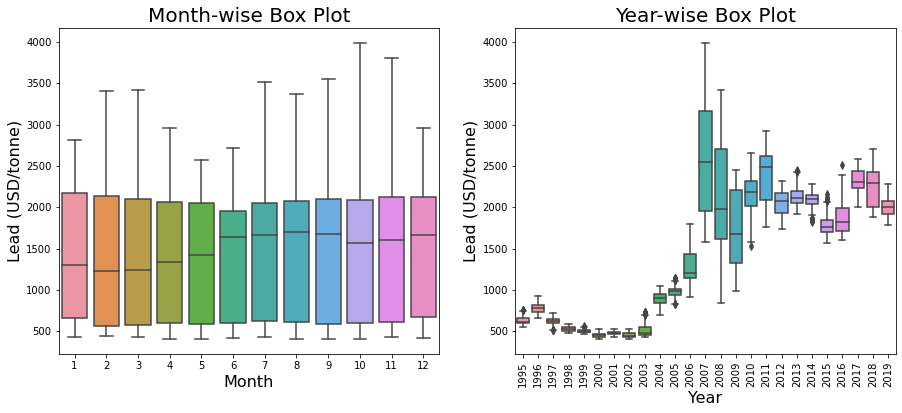

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


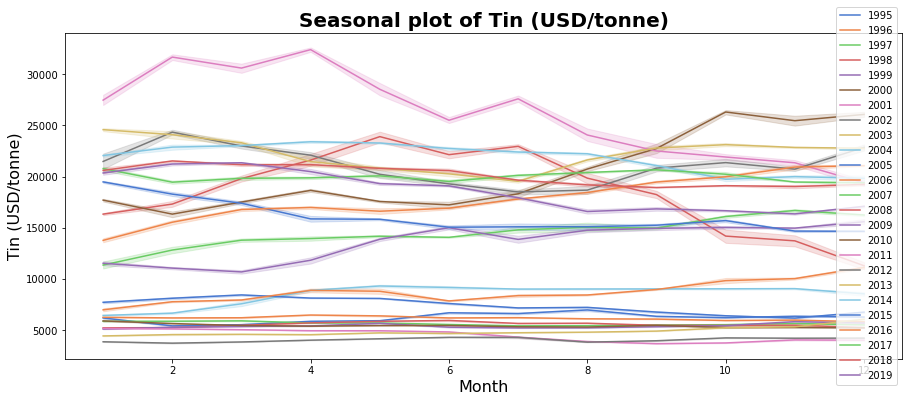

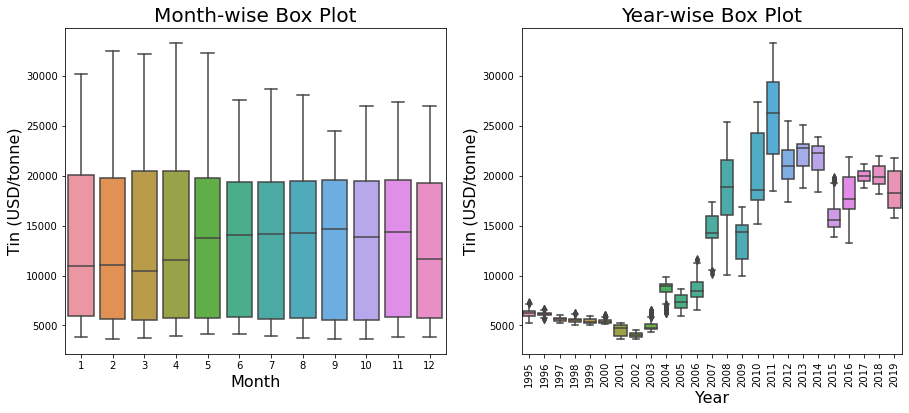

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


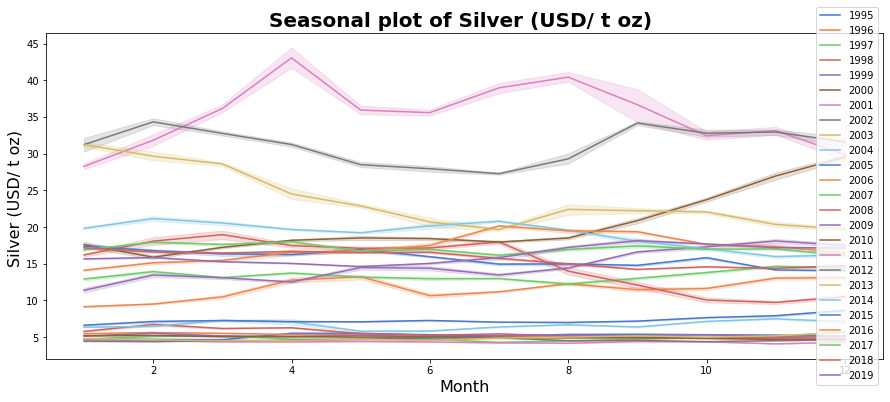

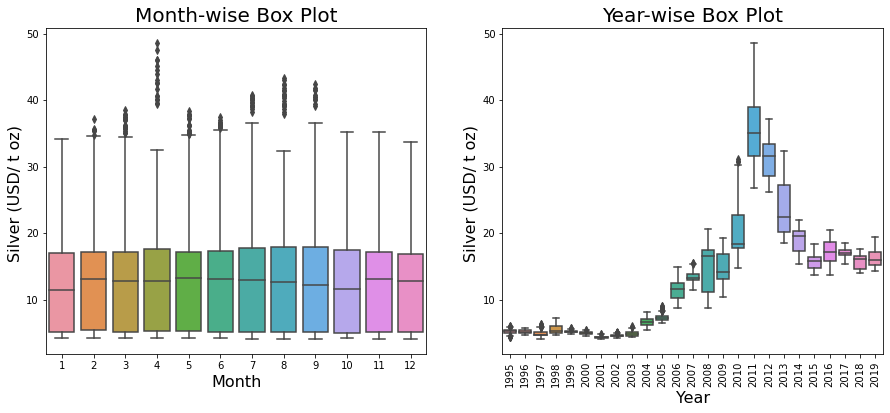

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


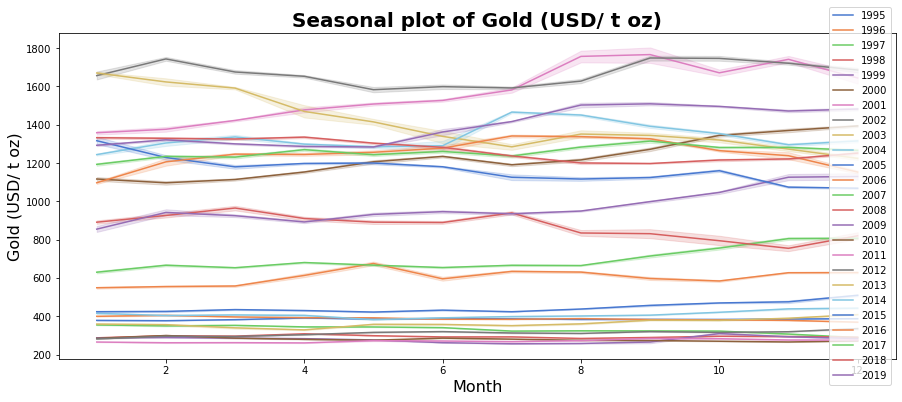

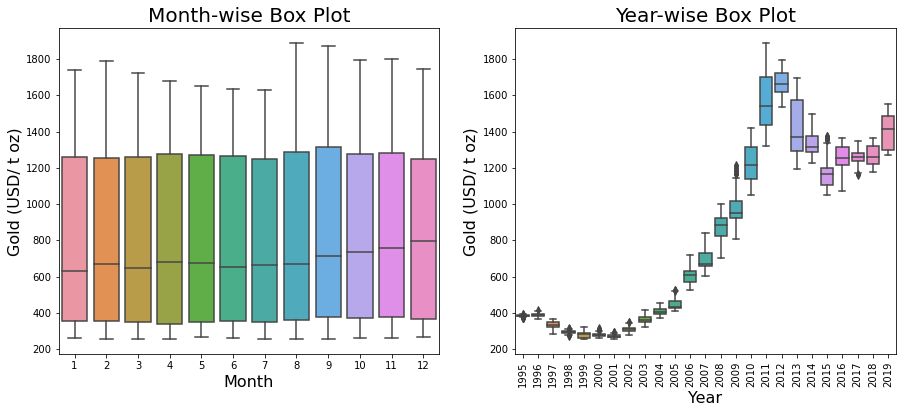

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


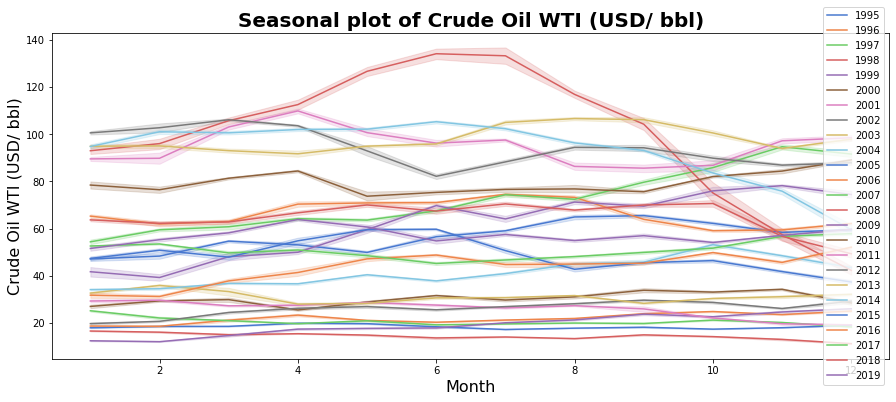

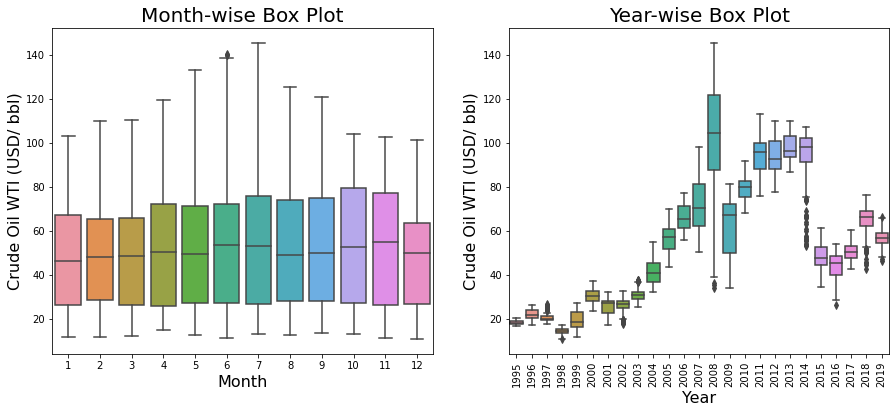

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


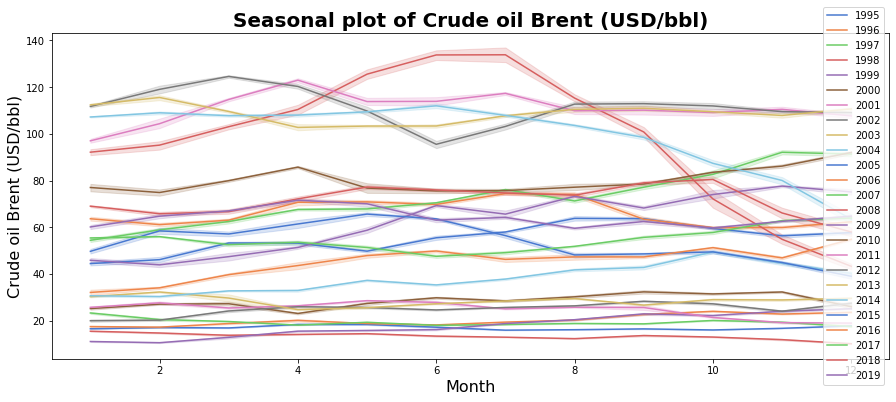

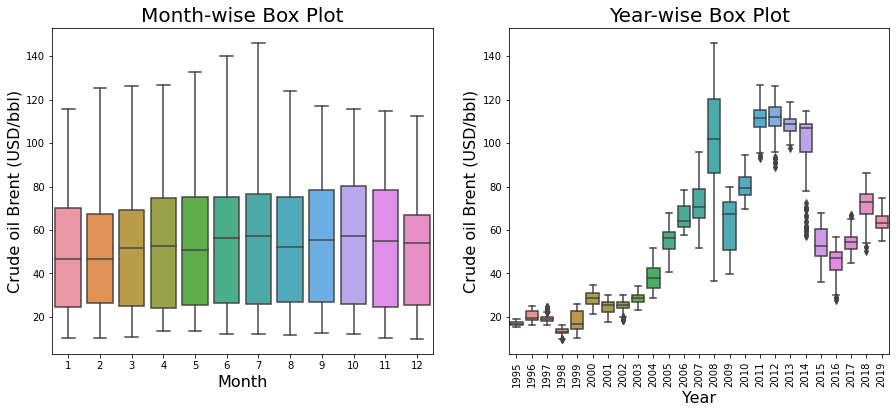

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


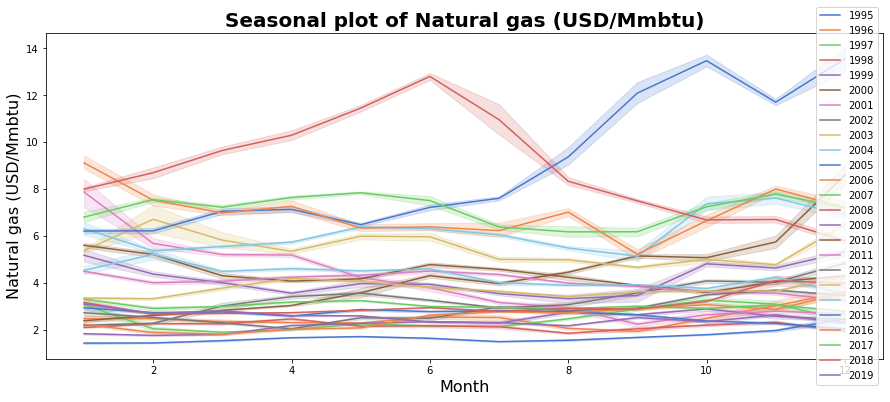

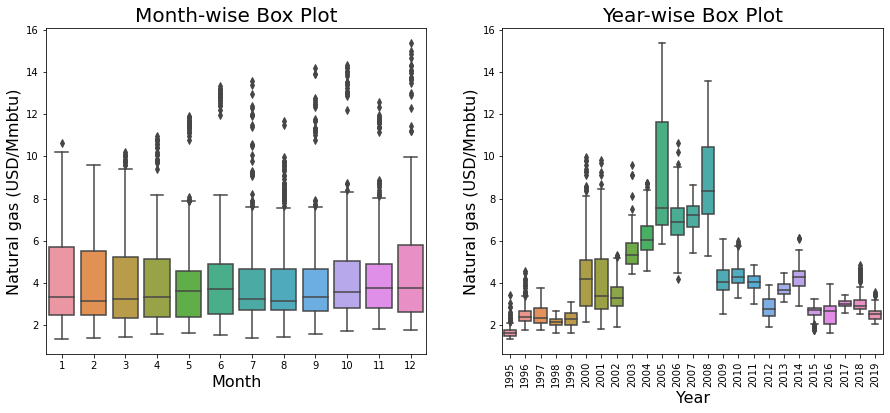

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


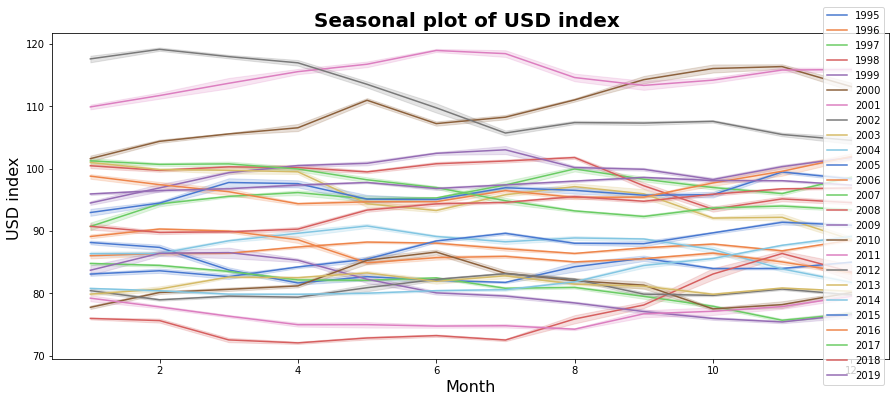

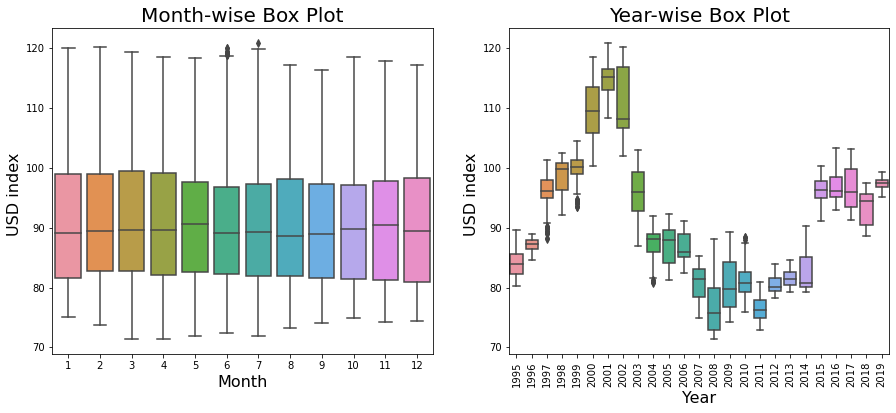

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


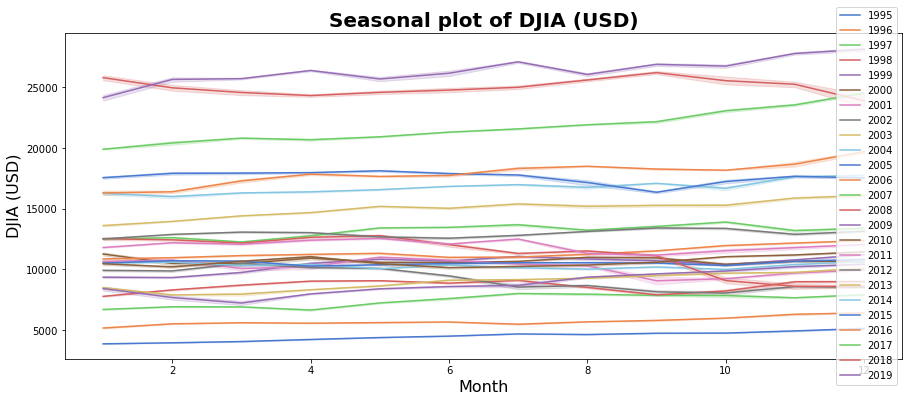

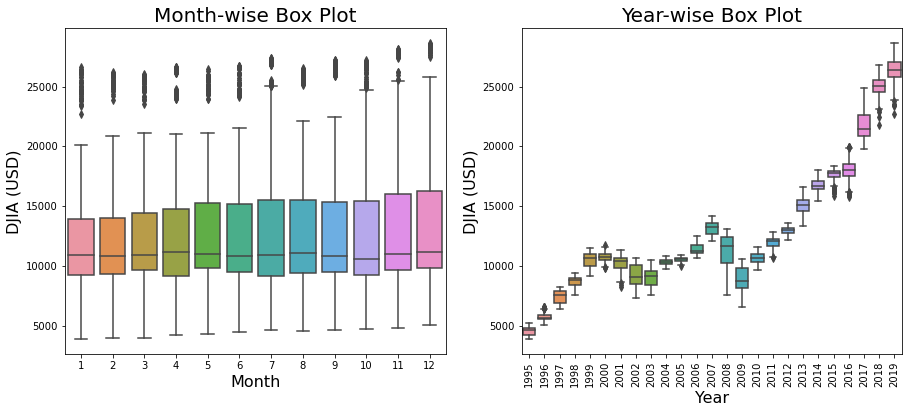

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


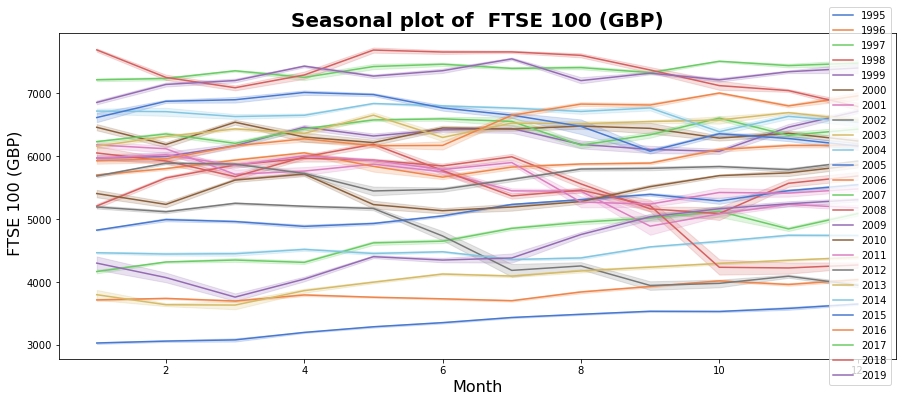

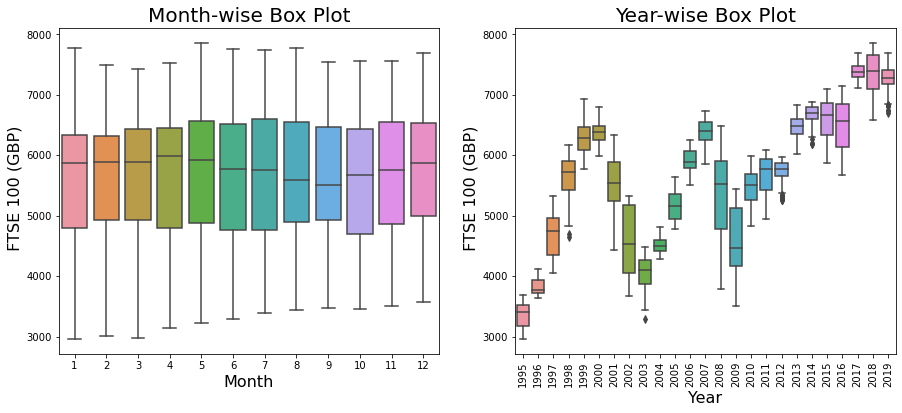

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


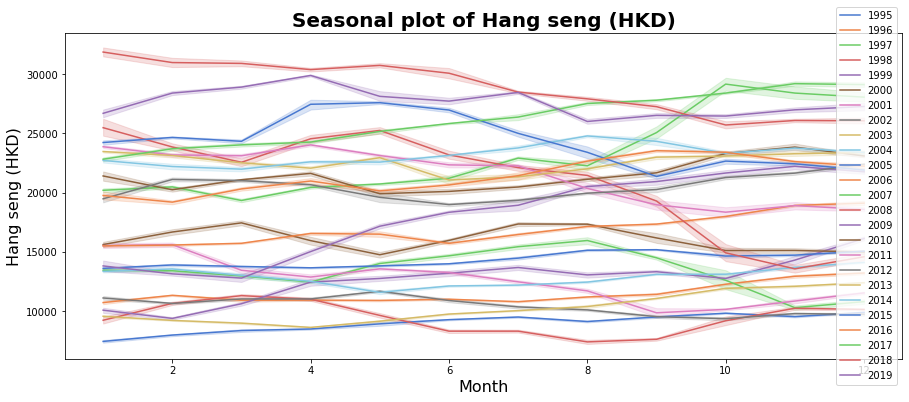

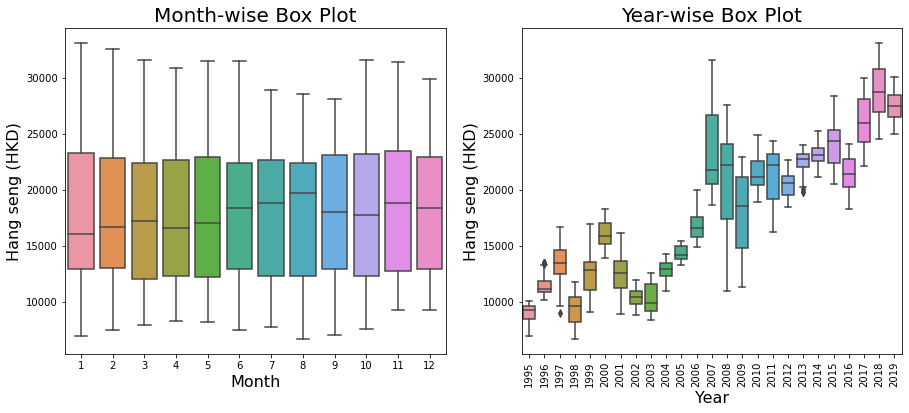

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_43284/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


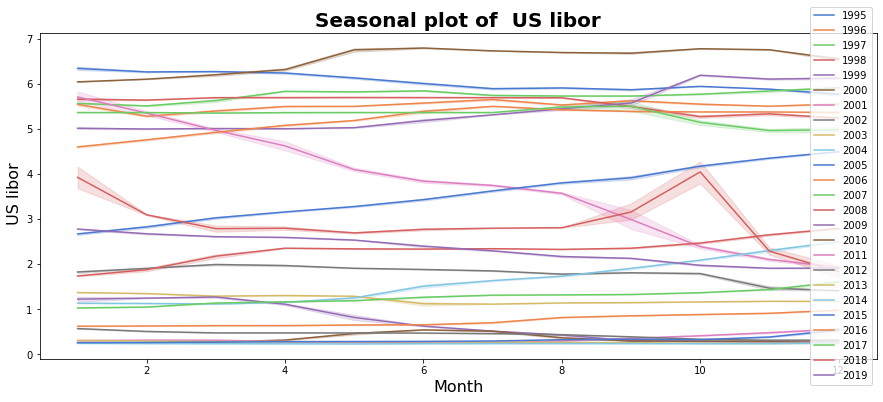

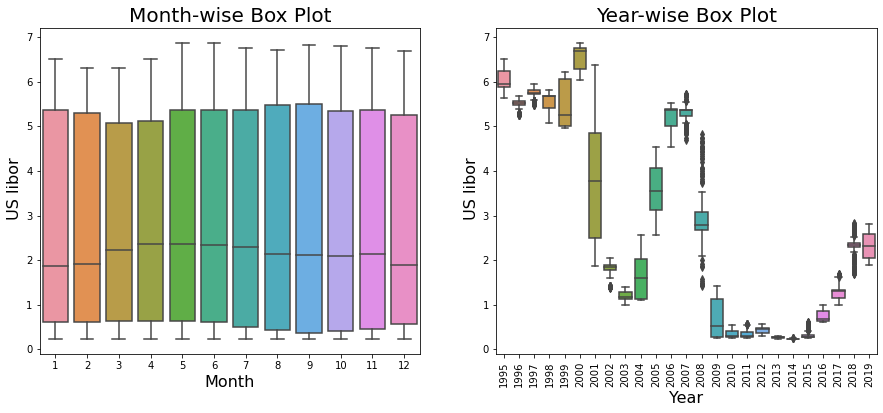

AttributeError: 'DataFrame' object has no attribute 'dt'

In [10]:
df['Date'] = df.index
for column in df.columns:
    season_plot(df, column)